In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data_income = pd.read_csv('income(1).csv')

In [3]:
data_income

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [4]:
data = data_income.copy() #creating copy

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [6]:
 data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [7]:
#summarizing the numerical data
summary_num = data.describe()

In [8]:
summary_num

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [9]:
#summarizing the categorical data
summary_cat = data.describe(include = "O")

In [10]:
summary_cat


,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [11]:
#frequencies of each categories
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [12]:
data['EdType'].value_counts()

 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506
 12th              417
 Doctorate         390
 5th-6th           318
 1st-4th           163
 Preschool          50
Name: EdType, dtype: int64

In [13]:
data['maritalstatus'].value_counts()

 Married-civ-spouse       14692
 Never-married            10488
 Divorced                  4394
 Separated                 1005
 Widowed                    979
 Married-spouse-absent      397
 Married-AF-spouse           23
Name: maritalstatus, dtype: int64

In [14]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [15]:
data['relationship'].value_counts()

 Husband           12947
 Not-in-family      8156
 Own-child          5005
 Unmarried          3384
 Wife               1534
 Other-relative      952
Name: relationship, dtype: int64

In [16]:
data['race'].value_counts()

 White                 27430
 Black                  3028
 Asian-Pac-Islander      956
 Amer-Indian-Eskimo      311
 Other                   253
Name: race, dtype: int64

In [17]:
data['gender'].value_counts()

 Male      21370
 Female    10608
Name: gender, dtype: int64

In [18]:
data['capitalgain'].value_counts()

0        29320
15024      341
7688       275
7298       242
99999      152
         ...  
1639         1
22040        1
7978         1
2387         1
5060         1
Name: capitalgain, Length: 119, dtype: int64

In [19]:
data['capitalloss'].value_counts()

0       30495
1902      197
1977      163
1887      157
1848       51
        ...  
1539        1
1844        1
2080        1
2489        1
1411        1
Name: capitalloss, Length: 92, dtype: int64

In [20]:
data['hoursperweek'].value_counts()

40    14932
50     2772
45     1784
60     1439
35     1277
      ...  
82        1
94        1
92        1
74        1
87        1
Name: hoursperweek, Length: 94, dtype: int64

In [21]:
data['nativecountry'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [22]:
data['SalStat'].value_counts()

 less than or equal to 50,000    24283
 greater than 50,000              7695
Name: SalStat, dtype: int64

In [23]:
print(np.unique(data['JobType']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [24]:
print(np.unique(data['occupation']))

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [25]:
#the special character values are considered as nan values
data = pd.read_csv('income(1).csv',na_values = [" ?"])

In [26]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [27]:
missing = data[data.isnull().any(axis=1)]

In [28]:
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [29]:
#missing values in jobtype = 1809
#missing values in occupation = 1816

In [30]:
data2 = data.dropna(axis=0)

In [31]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [32]:
#realtionship between the numerical/independent variables
correlation = data2.corr()

In [33]:
correlation
#the values are closer to 0 which indicates that none of these variables are correlated to each other

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [34]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [35]:
#gender proportion table
gender = pd.crosstab(index = data2['gender'],                  #row
                    columns = 'count',
                    normalize = True)

In [36]:
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


In [38]:
gender_salstat = pd.crosstab(index = data2['gender'],
                            columns = data2['SalStat'],
                            margins = True,
                            normalize = 'index')

In [39]:
gender_salstat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


C:\Users\yaybl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


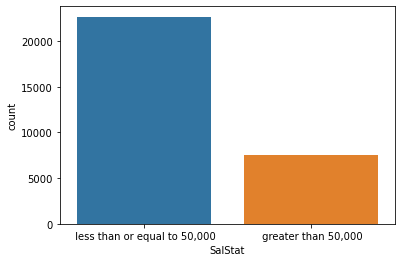

In [40]:
satstat = sns.countplot(data2['SalStat'])

C:\Users\yaybl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

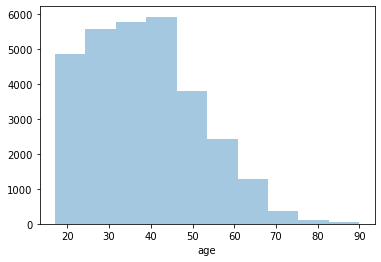

In [41]:
#histogram for age
sns.distplot(data2['age'], bins=10, kde = False)

In [42]:
#people in the age 20-45 are high in frequency

C:\Users\yaybl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='age'>

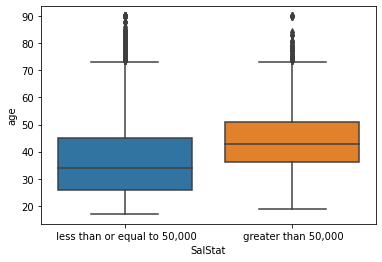

In [43]:
sns.boxplot('SalStat', 'age', data = data2)

In [44]:
#people from 25-45 earn less than or equal to 50000
#people from 35-50 earn greater than 50000

<AxesSubplot:xlabel='count', ylabel='JobType'>

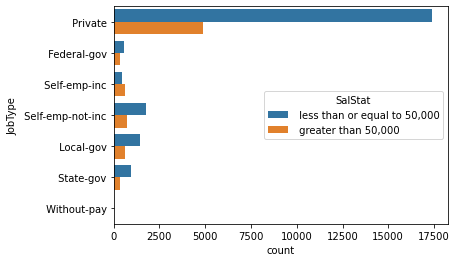

In [53]:
sns.countplot(y='JobType',data=data2, hue = 'SalStat')

In [54]:
#most of the individuals work in private organizations
#very few people work in the govt organizations

In [74]:
job_sal =pd.crosstab(index = data2["JobType"],columns = data2['SalStat'], margins = True, normalize =  'index')  
round(job_sal*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.7,61.3
Local-gov,29.5,70.5
Private,21.9,78.1
Self-emp-inc,55.9,44.1
Self-emp-not-inc,28.6,71.4
State-gov,26.9,73.1
Without-pay,0.0,100.0
All,24.9,75.1


In [75]:
#if the person is self-employeed, 56% of the people earn greater than 50000
#44% of the people earn less than or equal to 50000
#for the rest of the job types more or less 70% of the individuals earn less than or eqaul to 50000
#only for self-employeed there is more or less eqaul proportion for the categories

<AxesSubplot:xlabel='count', ylabel='EdType'>

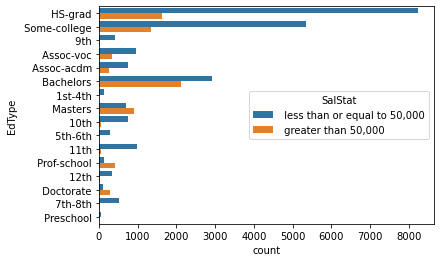

In [78]:
sns.countplot(y='EdType', data=data2, hue='SalStat')

In [79]:
#majority of the people who are HS-grad earn less than or equal to 50000

In [85]:
education_sal = pd.crosstab(index=data2['EdType'], columns = data2['SalStat'], margins = True, normalize = 'index')
round(education_sal*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


In [88]:
#people who has dont a doctorate,masters and prof-school are more likely to earn greater than 50000 

<AxesSubplot:xlabel='count', ylabel='occupation'>

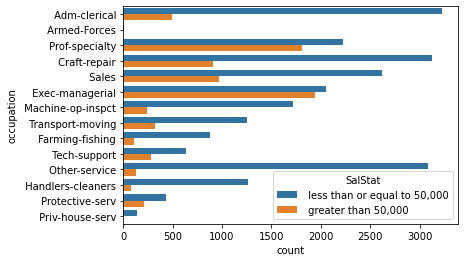

In [89]:
sns.countplot(y='occupation', data=data2, hue = 'SalStat')

In [90]:
occupation_sal = pd.crosstab(index=data2['occupation'], columns=data2['SalStat'], margins = True, normalize = 'index')
round(occupation_sal*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


In [91]:
#exec-managerial and prof-specialty people are likely to earn greater than 50000

C:\Users\yaybl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalgain'>

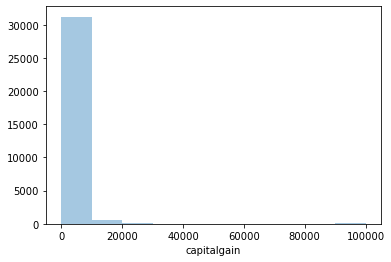

In [92]:
sns.distplot(data['capitalgain'],bins = 10,kde= False)

<AxesSubplot:xlabel='capitalloss'>

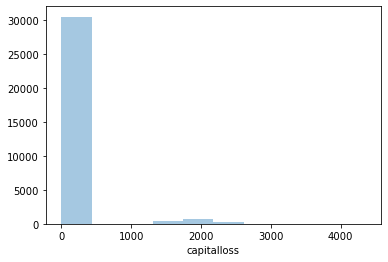

In [94]:
sns.distplot(data['capitalloss'],bins = 10,kde = False)

<AxesSubplot:xlabel='SalStat', ylabel='hoursperweek'>

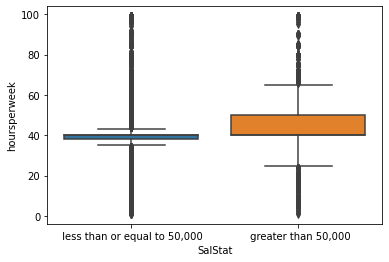

In [97]:
sns.boxplot(y=data2['hoursperweek'],
           x=data2['SalStat'])

In [98]:
#people who have spent around 40-50 hours per week are more likely to earn more than 50000
#people who have spent around 40 hours per wekk are more likely to earn less than or equal to 50000

In [99]:
#LOGISTIC REGRESSION

In [111]:
data3 = data.copy()

In [112]:
data3

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [122]:
data3['SalStat'] = data3['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

In [124]:
data3

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,0
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,0
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,0


In [127]:
#converting categorical variable to dummy variables(one hot encoding)
new_data = pd.get_dummies(data3, drop_first = True)

In [128]:
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Never-worked,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [129]:
#independent variable : x
#dependent variable : y

In [130]:
#storing the column names
columns_list = list(new_data.columns)

In [131]:
columns_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Never-worked',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-hou

In [132]:
#seperating input names from data
features = list(set(columns_list)-set(['SalStat']))

In [133]:
features

['EdType_ Assoc-voc',
 'maritalstatus_ Widowed',
 'maritalstatus_ Married-civ-spouse',
 'nativecountry_ South',
 'nativecountry_ Scotland',
 'JobType_ Never-worked',
 'nativecountry_ China',
 'race_ White',
 'age',
 'relationship_ Unmarried',
 'maritalstatus_ Never-married',
 'EdType_ Bachelors',
 'nativecountry_ Thailand',
 'EdType_ 1st-4th',
 'occupation_ Exec-managerial',
 'nativecountry_ Yugoslavia',
 'capitalgain',
 'nativecountry_ Holand-Netherlands',
 'EdType_ 5th-6th',
 'nativecountry_ Japan',
 'nativecountry_ India',
 'nativecountry_ Greece',
 'relationship_ Other-relative',
 'EdType_ 11th',
 'occupation_ Priv-house-serv',
 'nativecountry_ Hungary',
 'nativecountry_ England',
 'race_ Black',
 'relationship_ Wife',
 'occupation_ Armed-Forces',
 'nativecountry_ Nicaragua',
 'nativecountry_ Philippines',
 'nativecountry_ Peru',
 'JobType_ Without-pay',
 'nativecountry_ Puerto-Rico',
 'JobType_ Private',
 'gender_ Male',
 'EdType_ 12th',
 'EdType_ Preschool',
 'nativecountry_ Colu

In [134]:
#storing the output values in y
y = new_data['SalStat'].values

In [135]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [137]:
x = new_data[features].values

In [138]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [139]:
#splitting the data into train and test
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)
#random state is set to 0 so that the same set of samples will be used everytime the data is run

In [148]:
logistic = LogisticRegression()

In [150]:
#fitting the values of x and y
logistic.fit(train_x,train_y)

C:\Users\yaybl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [151]:
logistic.coef_

array([[-5.04751288e-02, -1.18493232e-01,  1.09323968e+00,
        -3.54593288e-02, -3.03943120e-03, -2.81190817e-03,
        -2.42200154e-02, -3.46953593e-01, -3.98724018e-03,
        -5.86414225e-01, -1.39369382e+00,  6.83720230e-01,
        -6.50505372e-03, -7.47602953e-02,  9.06786392e-01,
         1.33430532e-03,  3.15648187e-04, -8.88835594e-04,
        -1.57597211e-01,  7.49543413e-05, -9.34763463e-03,
        -1.33805709e-02, -2.62083162e-01, -3.43121456e-01,
        -3.82641648e-02,  1.40217490e-05,  2.48444910e-03,
        -4.23083114e-01,  2.66788539e-01, -3.39097054e-03,
        -1.84698865e-02, -2.44941745e-02, -1.04544924e-02,
        -7.11343416e-03, -3.86160605e-02, -1.91876813e-01,
         1.29211125e-01, -1.11922316e-01, -2.75241341e-02,
        -2.19464410e-02, -8.87888578e-03, -3.83156447e-01,
        -3.71985880e-02, -1.67304416e-02, -3.52995627e-03,
        -4.27495604e-01, -6.65793621e-03,  1.16676944e-02,
         2.47036464e-01,  1.54847953e-02, -1.47182158e-0

In [152]:
logistic.intercept_

array([-1.11096266])

In [153]:
#prediction from test data
prediction = logistic.predict(test_x)

In [154]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [155]:
confusion_matrix = confusion_matrix(test_y,prediction)

In [156]:
confusion_matrix

array([[6836,  500],
       [ 947, 1311]], dtype=int64)

In [157]:
 accuracy_score = accuracy_score(test_y,prediction)

In [158]:
accuracy_score

0.8491765686887638

In [159]:
#this means that 84.9% of the time the model is able to classify the records correctly

In [160]:
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1447


In [161]:
#to imporve the model we reduce the number of misclassified samples
#this is achieved by removing insignificant variables

In [162]:
cols = ['gender', 'nativecountry','race','JobType']
new_data2 = data3.drop(cols, axis=1)

In [163]:
new_data2

,age,EdType,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek,SalStat
0,45,HS-grad,Divorced,Adm-clerical,Not-in-family,0,0,28,0
1,24,HS-grad,Never-married,Armed-Forces,Own-child,0,0,40,0
2,44,Some-college,Married-civ-spouse,Prof-specialty,Husband,0,0,40,1
3,27,9th,Never-married,Craft-repair,Other-relative,0,0,40,0
4,20,Some-college,Never-married,Sales,Not-in-family,0,0,35,0
...,...,...,...,...,...,...,...,...,...
31973,34,HS-grad,Never-married,Farming-fishing,Not-in-family,594,0,60,0
31974,34,Some-college,Never-married,Protective-serv,Not-in-family,0,0,40,0
31975,23,Some-college,Married-civ-spouse,Adm-clerical,Husband,0,0,40,0
31976,42,Some-college,Married-civ-spouse,Adm-clerical,Wife,0,0,40,0


In [164]:
new_data2 = pd.get_dummies(new_data,drop_first=True)

In [165]:
columns_list = list(new_data2.columns)

In [166]:
columns_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Never-worked',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-hou

In [167]:
features = list(set(columns_list) - set(['SalStat']))

In [168]:
features

['EdType_ Assoc-voc',
 'maritalstatus_ Widowed',
 'maritalstatus_ Married-civ-spouse',
 'nativecountry_ South',
 'nativecountry_ Scotland',
 'JobType_ Never-worked',
 'nativecountry_ China',
 'race_ White',
 'age',
 'relationship_ Unmarried',
 'maritalstatus_ Never-married',
 'EdType_ Bachelors',
 'nativecountry_ Thailand',
 'EdType_ 1st-4th',
 'occupation_ Exec-managerial',
 'nativecountry_ Yugoslavia',
 'capitalgain',
 'nativecountry_ Holand-Netherlands',
 'EdType_ 5th-6th',
 'nativecountry_ Japan',
 'nativecountry_ India',
 'nativecountry_ Greece',
 'relationship_ Other-relative',
 'EdType_ 11th',
 'occupation_ Priv-house-serv',
 'nativecountry_ Hungary',
 'nativecountry_ England',
 'race_ Black',
 'relationship_ Wife',
 'occupation_ Armed-Forces',
 'nativecountry_ Nicaragua',
 'nativecountry_ Philippines',
 'nativecountry_ Peru',
 'JobType_ Without-pay',
 'nativecountry_ Puerto-Rico',
 'JobType_ Private',
 'gender_ Male',
 'EdType_ 12th',
 'EdType_ Preschool',
 'nativecountry_ Colu

In [170]:
y = new_data2['SalStat'].values

In [171]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [172]:
x = new_data2[features].values

In [173]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [190]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)

In [203]:
test_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [191]:
logistic = LogisticRegression()

In [193]:
logistic.fit(train_x,train_y)

C:\Users\yaybl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [204]:
prediction = logistic.predict(test_x)

In [212]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score = accuracy_score(test_y,prediction)

In [213]:
accuracy_score

0.8491765686887638

In [214]:
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1447


In [215]:
#KNN

In [217]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [218]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

In [219]:
KNN_classifier.fit(train_x,train_y)

KNeighborsClassifier()

In [220]:
prediction = KNN_classifier.predict(test_x)

In [221]:
prediction

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [222]:
confusion_matrix = confusion_matrix(test_y,prediction)

In [223]:
confusion_matrix

array([[6643,  693],
       [ 851, 1407]], dtype=int64)

In [225]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score = accuracy_score(test_y,prediction)

In [226]:
accuracy_score

0.839066082968522

In [227]:
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1544


In [230]:
Misclassified_sample = []
# Calculating error for K values between 1 and 20
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())

In [231]:
Misclassified_sample

[1782,
 1497,
 1614,
 1508,
 1544,
 1482,
 1503,
 1452,
 1483,
 1437,
 1473,
 1442,
 1455,
 1409,
 1427,
 1411,
 1428,
 1416,
 1422]

In [232]:
#the least value for k is 1409 for the value k=14 therefore we will fix the value of k to be 14